# Project M9: Exoplanet detection using the transit method

Marko Raidlo, Raidlo Everest

In [1]:
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

import numpy as np
import pandas as pd
from scipy import ndimage, fft
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

## Loading in the datasets

In [2]:
train = pd.read_csv('exoTrain.csv')
test = pd.read_csv('exoTest.csv')
    
train.columns = [train.columns[i].replace("FLUX.", "") for i in range(len(train.columns))]
test.columns = [test.columns[i].replace("FLUX.", "") for i in range(len(test.columns))]
    
#Replacing 2s and 1s with 1s and 0s.
train.LABEL = train.LABEL.replace(1, 0)
train.LABEL = train.LABEL.replace(2, 1)
test.LABEL = test.LABEL.replace(1, 0)
test.LABEL = test.LABEL.replace(2, 1)
    
#X and Y datasets
train_X = train.drop('LABEL', axis=1)
train_Y = train["LABEL"]

test_X = test.drop('LABEL', axis=1)
test_Y = test["LABEL"]

train_X.head()

,1,2,3,4,5,6,7,8,9,10,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## Preprocessing

In [3]:
def fourier(df):
        return np.abs(fft(df, n=df.size))

def pre_process(df):
    #Preprocessing method applies:
    # Fourier transform
    # Normalization
    # Gaussian filter
    # Standardization
    
    #Fourier
    df_copy = df.copy()
    df_copy = df_copy.apply(fourier ,axis=1)
    
    df_copy = pd.DataFrame(df_copy.tolist())
    df_copy  = df_copy.iloc[:,0:df_copy.shape[1]//2]
    
    # Normalize
    df_copy = pd.DataFrame(normalize(df_copy))

    # Gaussian filter to smooth out data
    df_copy = ndimage.filters.gaussian_filter(df_copy, sigma=10)

    # Standardize X data
    std_scaler = StandardScaler()
    df_copy = std_scaler.fit_transform(df_copy)
    
    return pd.DataFrame(df_copy)

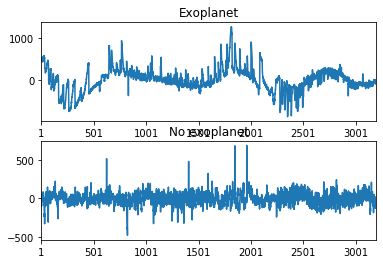

In [4]:
#Pre process plot

plt.subplot(211)
plt.title("Exoplanet")
train_X.iloc[2].plot()
plt.subplot(212)
plt.title("No exoplanet")
train_X.iloc[90].plot()

plt.show()

In [5]:
# Processing data
train_X = pre_process(train_X)
test_X = pre_process(test_X)

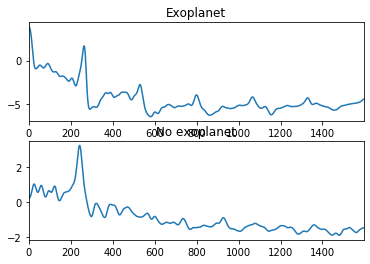

In [6]:
#Post process plot

plt.subplot(211)
plt.title("Exoplanet")
train_X.iloc[2].plot()
plt.subplot(212)
plt.title("No exoplanet")
train_X.iloc[90].plot()

plt.show()

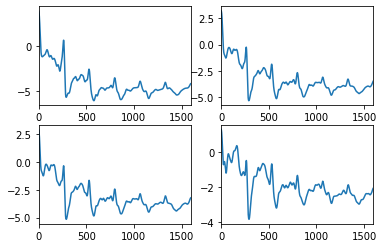

In [7]:
# Exoplanet star results
plt.subplot(221)
train_X.iloc[12].plot()
plt.subplot(222)
train_X.iloc[21].plot()
plt.subplot(223)
train_X.iloc[23].plot()
plt.subplot(224)
train_X.iloc[32].plot()


plt.show()

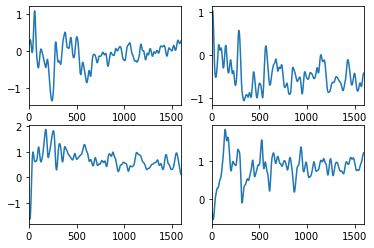

In [8]:
# Non exoplanet star results
plt.subplot(221)
train_X.iloc[1111].plot()
plt.subplot(222)
train_X.iloc[2231].plot()
plt.subplot(223)
train_X.iloc[4512].plot()
plt.subplot(224)
train_X.iloc[1233].plot()

plt.show()

## Building models

In [9]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




from sklearn.svm import LinearSVC

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [10]:
#Evaluation method:

def evaluate(model):
    train_result =  model.predict(train_X)
    test_result = model.predict(test_X)
    confm_train = confusion_matrix(train_Y, train_result)
    confm_test = confusion_matrix(test_Y, test_result)
    
    acc_train = accuracy_score(train_Y, train_result)
    acc_test = accuracy_score(test_Y, test_result)
    pre_train = precision_score(train_Y, train_result)
    pre_test = precision_score(test_Y, test_result)
    rec_train = recall_score(train_Y, train_result)
    rec_test = recall_score(test_Y, test_result)
    auc_train = roc_auc_score(train_Y, train_result)
    auc_test = roc_auc_score(test_Y, test_result)
    
    print("------------------Evaluation------------------")
    print("On training set:")
    print("Accuracy:", acc_train)
    print("Precision:", pre_train)
    print("Recall:", rec_train)
    print("AUC score:", auc_train)
    print("Confusion matrix:")
    print(confm_train)
    print("----------------------------------------------")
    print("On test set:")
    print("Accuracy:", acc_test)
    print("Precision:", pre_test)
    print("Recall:", rec_test)
    print("AUC score:", auc_test)
    print("Confusion matrix:")
    print(confm_test)
    print("--------------End of valuation----------------")

### Logistic Regression

In [11]:
model_log = LogisticRegression()
model_log.fit(train_X, train_Y)

evaluate(model_log)

C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------------Evaluation------------------
On training set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC score: 1.0
Confusion matrix:
[[5050    0]
 [   0   37]]
----------------------------------------------
On test set:
Accuracy: 0.9912280701754386
Precision: 0.5
Recall: 1.0
AUC score: 0.995575221238938
Confusion matrix:
[[560   5]
 [  0   5]]
--------------End of valuation----------------


### Support Vector Machine

### K Nearest Neighbours

### Decision tree

### Random forest

In [12]:
model_forest = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=3)
model_forest.fit(train_X, train_Y)

evaluate(model_forest)

------------------Evaluation------------------
On training set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC score: 1.0
Confusion matrix:
[[5050    0]
 [   0   37]]
----------------------------------------------
On test set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC score: 1.0
Confusion matrix:
[[565   0]
 [  0   5]]
--------------End of valuation----------------


### Clustering

### Different time series analysis tools

### Neural networks

In [13]:
#Maybe tensorflow??